In [1]:
# Imports
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plot_learning_curves(history, epochs=200, y_min=0):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)
#     plt.figure(2)
    plt.subplot(212)
    plt.plot(history.history['val_acc'], label='Val Accuracy')
    plt.plot(history.history['acc'], label = 'Training Accuracy')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(y_min, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

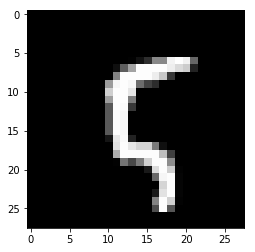

In [4]:
plt.imshow(x_train[100], cmap='gray')

In [5]:
def to_one_hot(array):
    num_unique = np.unique(array).shape[0]
    one_hot_array = np.zeros((array.shape[0], num_unique))
    one_hot_array[np.arange(array.shape[0]), array] = 1
    return one_hot_array

y_test = to_one_hot(y_test)
y_train = to_one_hot(y_train)

In [6]:
def normalize_features(array):
    return array / 255.0


def denormalize_features(array):
    return (np.round(array * 255)).astype(int)

In [7]:
from keras.layers import Conv3D

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s - loss: 0.4140 - acc: 0.8825 - val_loss: 0.2081 - val_acc: 0.9424
Epoch 2/10
48000/48000 [==============================] - 2s - loss: 0.2136 - acc: 0.9390 - val_loss: 0.1536 - val_acc: 0.9553
Epoch 3/10
48000/48000 [==============================] - 2s - loss: 0.1651 - acc: 0.9521 - val_loss: 0.1282 - val_acc: 0.9640
Epoch 4/10
48000/48000 [==============================] - 2s - loss: 0.1384 - acc: 0.9589 - val_loss: 0.1163 - val_acc: 0.9671
Epoch 5/10
48000/48000 [==============================] - 2s - loss: 0.1198 - acc: 0.9651 - val_loss: 0.1068 - val_acc: 0.9688
Epoch 6/10
48000/48000 [==============================] - 2s - loss: 0.1081 - acc: 0.9675 - val_loss: 0.1030 - val_acc: 0.9713
Epoch 7/10
48000/48000 [==============================] - 2s - loss: 0.0989 - acc: 0.9704 - val_loss: 0.0987 - val_acc: 0.9708
Epoch 8/10
48000/48000 [==============================] - 2s 

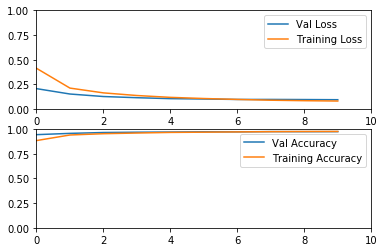

In [8]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(.2))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                               verbose=1, save_best_only=True)

sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(rms, loss='categorical_crossentropy', metrics=['accuracy'])
EPOCHS = 10

history = model.fit(normalize_features(x_train), y_train,
                    batch_size=100, epochs=EPOCHS,
                    validation_split=.2, callbacks=[checkpointer],
                    verbose=1)
plot_learning_curves(history, EPOCHS, y_min=0)

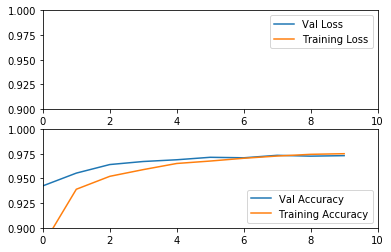

In [10]:
plot_learning_curves(history, EPOCHS, y_min=.9)

In [154]:
model.load_weights('mnist.model.best.hdf5')

In [11]:
dict([i for i in zip(model.metrics_names, model.evaluate(x_test, y_test))])

 9376/10000 [===========================>..] - ETA: 0s

{'acc': 0.97399999999999998, 'loss': 0.41615544418096545}

In [184]:
model.predict_proba(normalize_features(x_test[100:101]))

1/1 [==============================] - 0s


array([[  1.10884044e-04,   2.96025682e-04,   4.04190086e-03,
          1.42042001e-04,   8.39610075e-05,   1.85187382e-04,
          9.94636238e-01,   4.46925987e-05,   4.20725293e-04,
          3.84313171e-05]], dtype=float32)

# Can we do the same thing with CNNs?

### first try toy example from udacity

In [92]:
(x_train.shape[1], x_train.shape[2], 1)

(28, 28)

In [94]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=10,
                 kernel_size=3,
                 strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 14, 14, 10)        100       
Total params: 100.0
Trainable params: 100
Non-trainable params: 0.0
_________________________________________________________________


In [87]:
filter_size = 3
num_filters = 32
prev_layer_depth = 3

num_filters * filter_size ** 2 * prev_layer_depth + num_filters

num_filters * (filter_size **2 * prev_layer_depth + 1)

896

### Now try against mnist numbers

In [111]:
x_train.shape

(60000, 28, 28)

In [128]:
from keras import backend as K

In [167]:
K.image_data_format()

'channels_last'

In [211]:
model = Sequential()
# model.add(Flatten(input_shape=x_train.shape[1:]))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(.2))
# model.add(Dense(y_train.shape[1], activation='softmax'))
model.add(Conv2D(filters=10, kernel_size=7,
                 strides=2, padding='same',
                 activation='relu',
                 input_shape=(x_train.shape[1], x_train.shape[2], 1),
                 data_format='channels_last'))
model.add(Dropout(.1))
model.add(Conv2D(filters=20, kernel_size=5,
                 strides=2, padding='same',
                 activation='relu'))
model.add(Dropout(.1))
model.add(Conv2D(filters=10, kernel_size=5,
                 strides=1, padding='valid',
                 activation='relu'))
model.add(Flatten())
# model.add(Dense(10, activation='relu'))
# model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_179 (Conv2D)          (None, 14, 14, 10)        500       
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 7, 7, 20)          5020      
_________________________________________________________________
dropout_33 (Dropout)         (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 3, 3, 10)          5010      
_________________________________________________________________
flatten_30 (Flatten)         (None, 90)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                910       
Total para

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s - loss: 1.1562 - acc: 0.6471 - val_loss: 0.5337 - val_acc: 0.8462
Epoch 2/10
48000/48000 [==============================] - 15s - loss: 0.5149 - acc: 0.8435 - val_loss: 0.3525 - val_acc: 0.8937
Epoch 3/10
48000/48000 [==============================] - 15s - loss: 0.3765 - acc: 0.8873 - val_loss: 0.2723 - val_acc: 0.9186
Epoch 4/10
48000/48000 [==============================] - 15s - loss: 0.2946 - acc: 0.9125 - val_loss: 0.2054 - val_acc: 0.9413
Epoch 5/10
48000/48000 [==============================] - 16s - loss: 0.2367 - acc: 0.9299 - val_loss: 0.1721 - val_acc: 0.9490
Epoch 6/10
48000/48000 [==============================] - 15s - loss: 0.2003 - acc: 0.9395 - val_loss: 0.1621 - val_acc: 0.9522
Epoch 7/10
48000/48000 [==============================] - 16s - loss: 0.1741 - acc: 0.9479 - val_loss: 0.1278 - val_acc: 0.9614
Epoch 8/10
48000/48000 [==============================

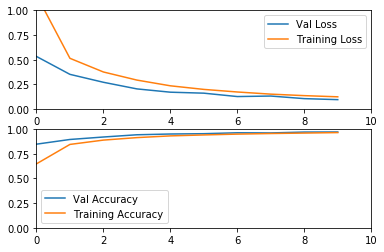

In [212]:
EPOCHS = 10
checkpointer = ModelCheckpoint(filepath='mnist.model.bestconv2d.hdf5',
                               verbose=1, save_best_only=True)
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(rms, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(normalize_features(x_train).reshape(60000, 28, 28, 1),
                    y_train, batch_size=1000, epochs=EPOCHS,
                    validation_split=.2, callbacks=[checkpointer],
                    verbose=1)
plot_learning_curves(history, EPOCHS, y_min=0)

In [213]:
model.evaluate(normalize_features(x_test).reshape(10000, 28, 28, 1), y_test)

 9856/10000 [============================>.] - ETA: 0s

[0.087898774483986197, 0.97270000000000001]

In [233]:
def normalize_number(pixel_matrix):
    normalized_features = normalize_features(pixel_matrix)
    reshaped = normalized_features.reshape(1, 28, 28, 1)
    return model.predict_classes(reshaped)

In [239]:
num = 3222

In [240]:
normalize_number(x_test[num])

1/1 [==============================] - 0s


array([6])

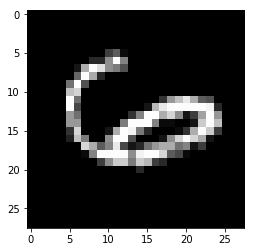

In [241]:
plt.imshow(x_test[num], cmap='gray')

### Let's visualize the different layers

let's come back to this

In [249]:
from keras import backend as K

In [242]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [257]:
layer_dict.pop('dense_58')
layer_dict.pop('dropout_32')
layer_dict.pop('dropout_33')
layer_dict.pop('flatten_30')

In [258]:
layer_dict

{'conv2d_179': <keras.layers.convolutional.Conv2D at 0x1246b4c88>,
 'conv2d_180': <keras.layers.convolutional.Conv2D at 0x124985518>,
 'conv2d_181': <keras.layers.convolutional.Conv2D at 0x124ad63c8>}

In [250]:
layer_name = 'conv2d_179'
filter_index = 0
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])
# grads = K.gradients(loss, input_img)

<tf.Tensor 'conv2d_179/Relu:0' shape=(?, 14, 14, 10) dtype=float32>